In [1]:
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
import itertools
import pandas as pd

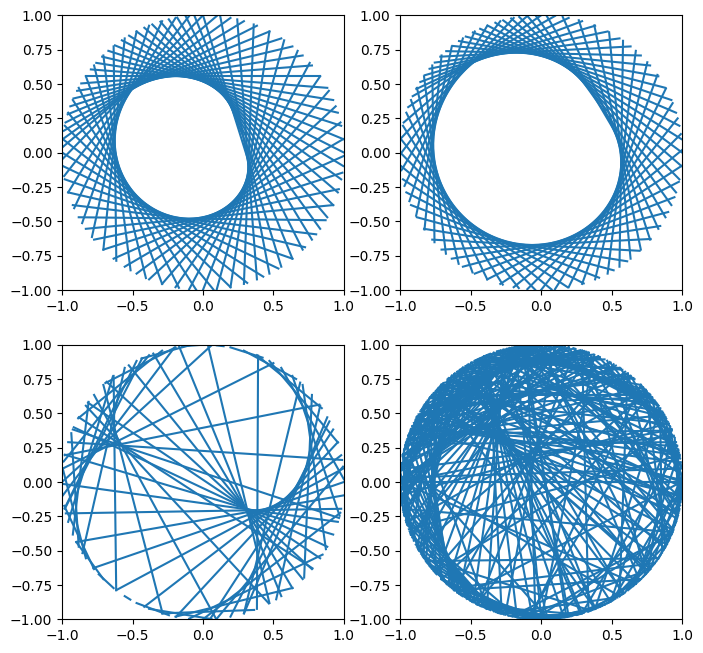

In [2]:
from decimal import *
import matplotlib.lines as mlines
import pickle

def log2(number: Decimal) -> Decimal:
    return number.ln()/Decimal(2).ln()


def get_row(number: Decimal) -> Decimal:
    return round_down(log2(number))


def get_col(row: Decimal, number: Decimal) -> Decimal:
    return (number - (2**row + 1)) // 2


def get_row_count(row: Decimal) -> Decimal:
    return (2**(row+1)-2**row)//2


def round_down(number: Decimal) -> Decimal:
    return number.quantize(Decimal('1.'), rounding=ROUND_DOWN)


def rotate(vec: tuple[float, float], radians: float):
    ca = math.cos(radians)
    sa = math.sin(radians)
    x = (vec[0] * ca) - (vec[1] * sa)
    y = (vec[0] * sa) + (vec[1] * ca)
    return (x, y)


def get_location(number: Decimal, radius: float=1):
    return rotate((0.0, radius), get_number_angle(number))


def get_number_angle(number: Decimal):
    if number == 1:
        return 0
    elif number == 3:
        return math.pi
    elif number == 5:
        return math.pi*3/2
    elif number == 7:
        return math.pi/2
    else:
        row = get_row(number)
        col = get_col(row, number)
        return (Decimal(2*math.pi)*col)/get_row_count(row)

def line(ax, x1, y1, x2, y2):
    ax.add_line(mlines.Line2D([x1,x2], [y1,y2]))


subplot_size=4
subplot_cols=2
subplot_rows=2

fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(subplot_size*subplot_cols,subplot_size*subplot_rows), dpi=100)
ax = ax.flatten()

def dreamcatcher(ax, func):
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])

    height=8

    for i in range(1, 2**height, 2):
        if get_row(Decimal(i))<7:
            continue
        x1, y1=get_location(Decimal(i))
        x2, y2=get_location(func(Decimal(i)))
        line(ax, x1, y1, x2, y2)

dreamcatcher(ax[0], lambda number: number*10)
dreamcatcher(ax[1], lambda number: number*19)
dreamcatcher(ax[2], lambda number: number**3)

infile = open('primes_179424673.bin', 'rb')
primes = pickle.load(infile)
infile.close()

ax[3].set_xlim([-1,1])
ax[3].set_ylim([-1,1])

for i in range(len(primes)):
    if len(primes)<=i**2:
        break
    x1, y1 = get_location(primes[i])
    x2, y2 = get_location(primes[i**2])
    line(ax[3], x1, y1, x2, y2)

plt.show()


In [3]:
# 0 = y^4 - x^3 + 21x
def caustic_1(x, y):
    return y**4 - x**3 + 21*x

def caustic_2(x, y):
    return y**2 - x**3 + 15*x

def caustic_3(x, y):
    return y**2 - x**3 + 93*x


In [4]:
# subplot_size=4
# subplot_cols=2
# subplot_rows=2

# fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(subplot_size*subplot_cols,subplot_size*subplot_rows), dpi=100)
# ax = ax.flatten()

# y, x = np.ogrid[-20:20:100j, -20:20:100j]
# ax[0].contour(x.ravel(), y.ravel(), caustic_1(x, y), [0])
# ax[0].grid()

# t = np.arange(-10, 10, 1)
# step=0.001
# x_list = [x * step for x in range(int(-10/step), int(10/step))]

# ax[1].contour(x.ravel(), y.ravel(), caustic_2(x, y), [0])
# ax[1].grid()

# ax[2].contour(x.ravel(), y.ravel(), caustic_2(x, y), [0])
# ax[2].grid()

# ax[3].contour(x.ravel(), y.ravel(), caustic_2(x, y), [0])
# ax[3].grid()

# plt.show()
